# Computer Vision Approach

In [1]:
import matplotlib as plt
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (13, 8)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important;} </style>"))

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [4]:
import cv2
import os
import json
import argparse
import numpy as np
import matplotlib.pyplot as plt

from utils.utils import show
from match_template import LoLChampionDetector

### Obtain Parameters from Config

In [7]:
config_path = './config.json'
config = json.load(open(config_path, "r"))
game_img_path = config["paths"]["game_image_path"]
champion_folder = config["paths"]["champion_folder"]
min_template_size = config["cv"]["min_template_size"]
max_template_size = config["cv"]["max_template_size"]


### Isolate leaderboard images of the teams

In [8]:
lol_object = LoLChampionDetector(game_img_path, champion_folder)
team_left, team_right = lol_object.split_game_image()

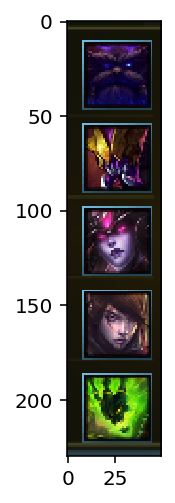

In [9]:
plt.imshow(team_left ,cmap='gray')
plt.show()

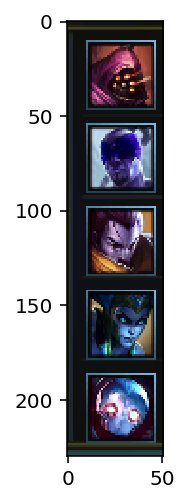

In [10]:
plt.imshow(team_right ,cmap='gray')
plt.show()

### Template Matching

Use the champion images as the templates and try to match it to the above team_left and team_right images. Since the image size of the templates and the champions in the screenshot do not match, try resizing the template to obtain the perfect match sizes.

In [11]:
all_sizes = np.arange(min_template_size, max_template_size + 1)

left_predictions = lol_object.compare_all_champions(team_left, all_sizes)
right_predictions = lol_object.compare_all_champions(team_right, all_sizes)

best_size = lol_object.find_best_scale(left_predictions)
print("Detected best size to scale champions as {} pixels.\n".format(best_size))

Detected best size to scale champions as 35 pixels.



In [12]:
left_players, ordered_champions, ordered_vals = lol_object.get_matched_players(
    left_predictions, best_size
)
right_players, ordered_champions, ordered_vals = lol_object.get_matched_players(
    right_predictions, best_size
)
print("Left team members are predicted as: \n {}\n".format(left_players))
print("Right team members are predicted as: \n {}\n".format(right_players))

Left team members are predicted as: 
 ['Syndra', 'Aphelios', 'Thresh', 'RekSai', 'Ornn']

Right team members are predicted as: 
 ['LeeSin', 'Yasuo', 'Blitzcrank', 'Jax', 'Cassiopeia']

